 
 - https://www.kaggle.com/themlphdstudent/cheat-sheet-seaborn-charts
 - https://seaborn.pydata.org/introduction.html
 - https://seaborn.pydata.org/tutorial.html
 - https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
 - https://medium.com/@neuralnets/statistical-data-visualization-series-with-python-and-seaborn-for-data-science-5a73b128851d
 - https://medium.com/@ppeng08/interactive-visualization-for-exploratory-data-analysis-in-jupyter-notebook-adc826e1e76a
 - https://gist.github.com/noklam/ddd503085c5aa0c27ddb0eceb4a2f07b
 - https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf
 - https://python.quantecon.org/index_toc.html
 - http://seaborn.pydata.org/tutorial/axis_grids.html
 - http://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples
 - https://www.youtube.com/watch?v=KvZ2KSxlWBY 
 - https://github.com/micgonzalez/Data-Visualization-of-Pokemon-Data-with-Python-and-Seaborn_side_project
 - https://github.com/pseudoPixels/iSeaborn
 - https://github.com/chmduquesne/quickviz
 - https://www.tutorialspoint.com/seaborn/index.htm


# Plot list

Figure level plots : create their own figure, accept `col` to create facet, `kind`, return a `FacetGrid` instance : 
- `displot` : defaults to scatterplot with `FacetGrid
- `relplot` : defaults to histplot with `FacetGrid
- `catplot` : defaults to stripplot with `FacetGrid
- `jointplot` : return a JointGrid
- `pairplot` : return a PairGrid
- `lmplot` : combine `regplot` and `FacetGrid`

Axes-level plots : act like drop-in replacements for matplotlib function, call matplotlib.pyplot.gca() internally, additionally accept an ax= argument

Objects : 
 - `FacetGrid`
 - `PairGrid`
 
Axes-level plots : 
High level categorical plot : `catplot()`
 - scatter

Categorical scatter 
 - `stripplot` : `catplot(kind="strip")`
 - `swarmplot` : `catplot(kind="swarm")`
 
Categorical distribution plots:
 - `boxplot()` : `kind="box`
 - `violinplot()` : `kind="violin"`
 - `boxenplot()` :  `kind="boxen"`
 
Categorical estimate plots:
 - `pointplot()` : `kind="point"`
 - `barplot()` : `kind="bar"`
 - `countplot()` : `kind="count"`

In [1]:
%matplotlib ipympl
import seaborn as sns
import pandas as pd
import ipywidgets
import matplotlib.pyplot as plt

# Common datasets

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
iris_df = sns.load_dataset("iris")
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
titanic_df = sns.load_dataset("titanic")
print(titanic_df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
tips_df = sns.load_dataset("tips")
print(tips_df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


# Theme, style, context, palette

Seaborn splits matplotlib parameters into two independent groups. The first group sets the aesthetic style of the plot, and the second scales various elements of the figure so that it can be easily incorporated into different contexts.  
The interface for manipulating these parameters are two pairs of functions. To control the style, use the axes_style() and set_style() functions. To scale the plot, use the plotting_context() and set_context() functions. In both cases, the first function returns a dictionary of parameters and the second sets the matplotlib defaults.

```python
sns.set_theme()        # set style and context

sns.axes_style()       # control style, returns a dictionnary of params
sns.plotting_context() # control context, returns a dictionnary of params

sns.set_style()        # sets matplotlib default
sns.set_context()      # sets matplotlib default
```

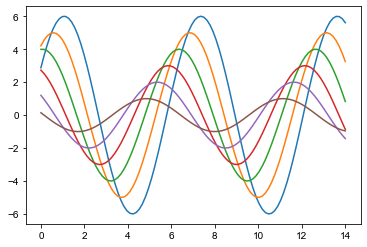

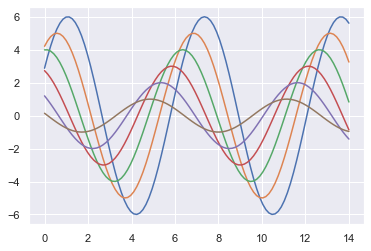

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def sinplot(ax, flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        ax.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

fig, ax = plt.subplots()
sinplot(ax)

sns.set_theme()

fig, ax = plt.subplots()
sinplot(ax)

## theme
To activate default theme of seaborn : 
```python
sns.set_theme()
seaborn.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1, 
    color_codes=True,
    rc=None
)
#seaborn.set(*args, **kwargs) : Alias for set_theme(), which is preferred
```

In [ ]:
sns.set(rc={'figure.figsize': (12, 10)})

## style

To activate style : 
```python
sns.set_style("darkgrid")
sns.set_style("whitegrid")
sns.set_style("dark")
sns.set_style("white")
sns.set_style("ticks")

sns.set_style("darkgrid", {'axes.axisbelow': False})
sns.set_style("darkgrid")

print(sns.axes_style())

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False, 
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0), 
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-', 
 'text.color': 'black',
 'xtick.color': 'black', 
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False, 
 'image.cmap': 'viridis', 
 'font.family': ['sans-serif'], 
 'font.sans-serif': ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande',                          'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif'], 
 'xtick.bottom': True,
 'xtick.top': False, 
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True, 
 'axes.spines.bottom': True,
 'axes.spines.right': True, 
 'axes.spines.top': True
}
```
Style can be used in context :
```python
with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sinplot()
```

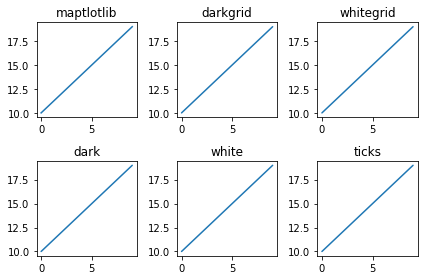

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
x, y = np.arange(20).reshape(2, 10)

fig, axes = plt.subplots(2, 3, figsize=(6, 4))
axes = axes.flatten()

# matplotlib
axes[0].plot(x, y) 
axes[0].set_title("maptlotlib")

# seaborn
styles = ["darkgrid", "whitegrid", "dark", "white", "ticks"]
for s, ax in zip(styles, axes[1:]):
    with sns.axes_style(s):
        ax.plot(x, y)
        ax.set_title(s)

fig.tight_layout()

## context
Context sizes : paper < notebook < talk < poster
(notebook parameters scaled by .8, 1.3, and 1.6, respectively)

```python
sns.set_context("paper")
sns.set_context("notebook")
sns.set_context("talk")
sns.set_context("poster")

with sns.plotting_context("paper"):
    #
```

In [7]:
sns.plotting_context()

{'font.size': 10.0,
 'axes.labelsize': 'medium',
 'axes.titlesize': 'large',
 'xtick.labelsize': 'medium',
 'ytick.labelsize': 'medium',
 'legend.fontsize': 'medium',
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0,
 'legend.title_fontsize': None}

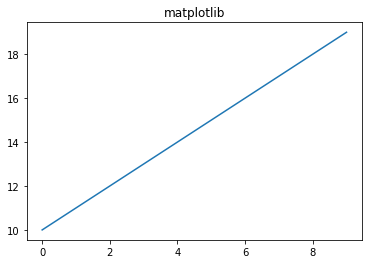

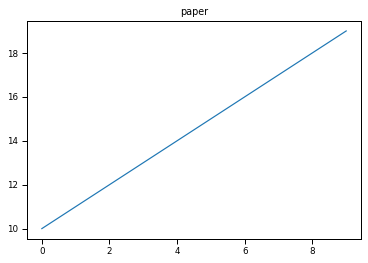

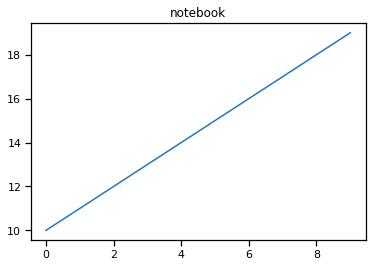

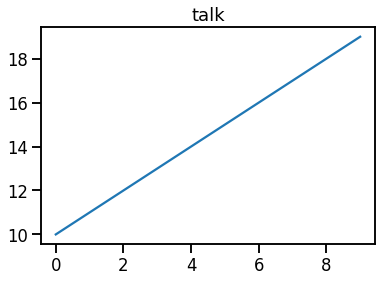

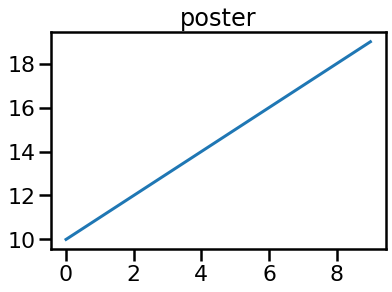

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
x, y = np.arange(20).reshape(2, 10)

# matplotlib
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("matplotlib")
# seaborn plotting context
with sns.plotting_context("paper"):
    f, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title("paper")
with sns.plotting_context("notebook"):
    f, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title("notebook")
with sns.plotting_context("talk"):
    f, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title("talk")
with sns.plotting_context("poster"):
    f, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title("poster")

## despine

To remove top and right axes spines : sns.despine()
```python
sns.despine(
    fig=None,
    ax=None, 
    top=True,
    right=True,
    left=False,
    bottom=False,
    offset=None,
    trim=False
)
```

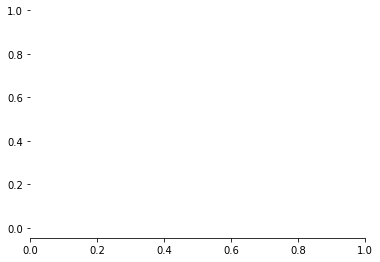

In [32]:
fig, ax = plt.subplots()
sns.despine(fig=fig, left=True, bottom=False, trim=False, offset=10)

## palettes

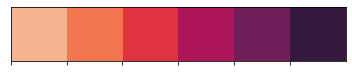

In [2]:
import seaborn as sns
sns.palplot(sns.color_palette("rocket_r"))

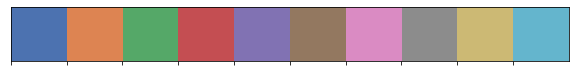

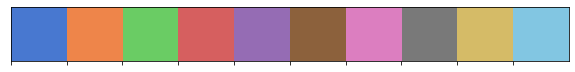

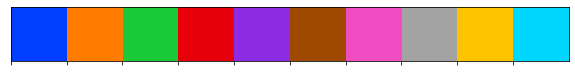

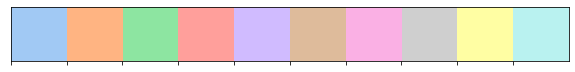

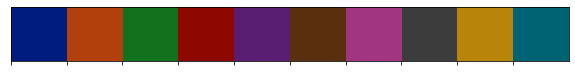

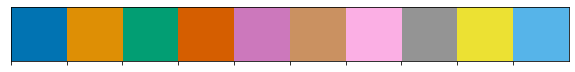

In [3]:
sns_palettes = [
    'deep',
    'muted',
    'bright',
    'pastel',
    'dark',
    'colorblind'
]
for p in sns_palettes:
    sns.palplot(sns.color_palette(p))

Accent
Accent_r
Blues
Blues_r
BrBG
BrBG_r
BuGn
BuGn_r
BuPu
BuPu_r
CMRmap
CMRmap_r
Dark2
Dark2_r
GnBu
GnBu_r
Greens
Greens_r
Greys
Greys_r
OrRd
OrRd_r
Oranges
Oranges_r
PRGn
PRGn_r
Paired
Paired_r
Pastel1
Pastel1_r
Pastel2
Pastel2_r
PiYG
PiYG_r
PuBu
PuBuGn
PuBuGn_r
PuBu_r
PuOr
PuOr_r
PuRd
PuRd_r
Purples
Purples_r
RdBu
RdBu_r
RdGy
RdGy_r
RdPu
RdPu_r
RdYlBu
RdYlBu_r
RdYlGn
RdYlGn_r
Reds
Reds_r
Set1
Set1_r
Set2
Set2_r
Set3
Set3_r
Spectral
Spectral_r
Wistia
Wistia_r
YlGn
YlGnBu
YlGnBu_r
YlGn_r
YlOrBr
YlOrBr_r
YlOrRd
YlOrRd_r
afmhot
afmhot_r
autumn
autumn_r
binary
binary_r
bone
bone_r
brg
brg_r
bwr
bwr_r
cividis
cividis_r
cool
cool_r
coolwarm
coolwarm_r
copper
copper_r
cubehelix
cubehelix_r
flag
flag_r
gist_earth
gist_earth_r
gist_gray
gist_gray_r
gist_heat
gist_heat_r
gist_ncar
gist_ncar_r
gist_rainbow
gist_rainbow_r
gist_stern
gist_stern_r
gist_yarg
gist_yarg_r
gnuplot
gnuplot2
gnuplot2_r
gnuplot_r
gray
gray_r
hot
hot_r
hsv
hsv_r
icefire
icefire_r
inferno
inferno_r
jet_r
magma
magma_r
mako

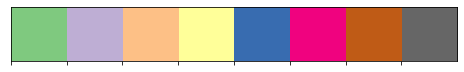

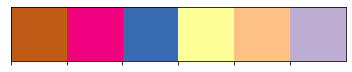

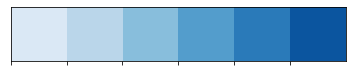

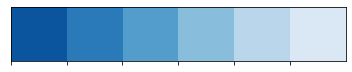

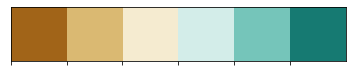

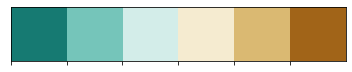

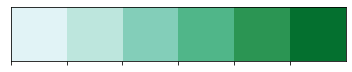

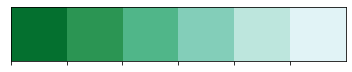

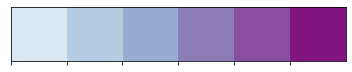

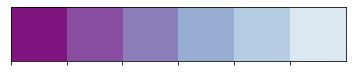

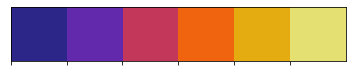

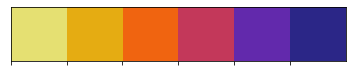

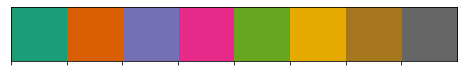

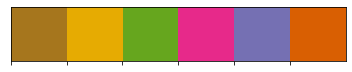

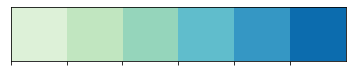

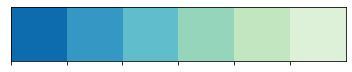

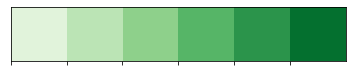

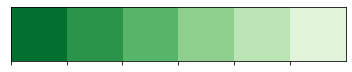

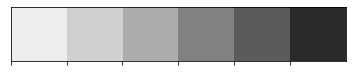

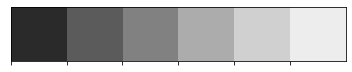

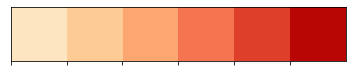

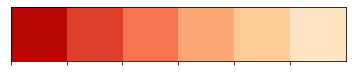

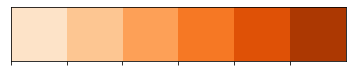

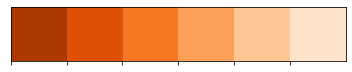

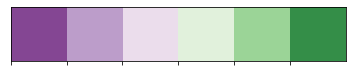

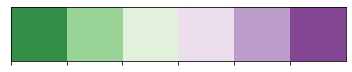

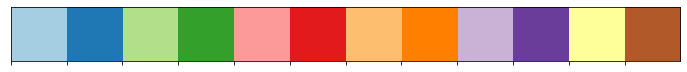

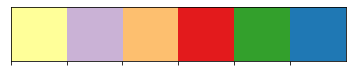

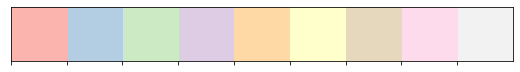

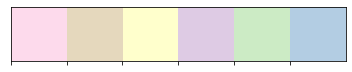

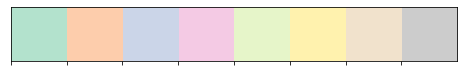

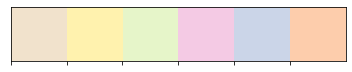

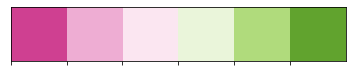

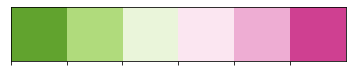

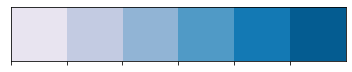

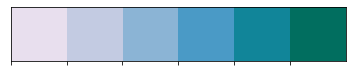

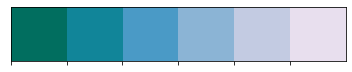

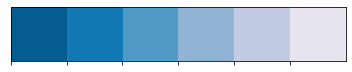

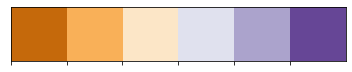

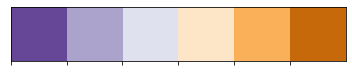

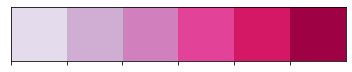

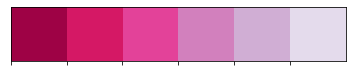

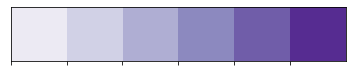

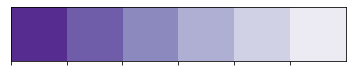

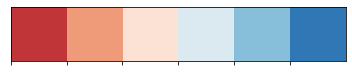

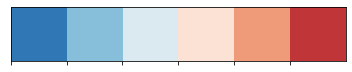

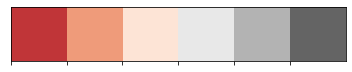

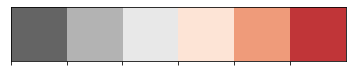

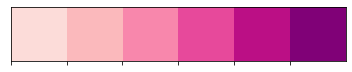

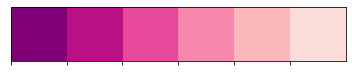

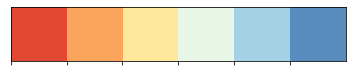

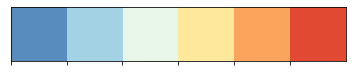

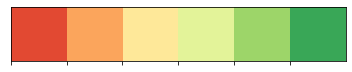

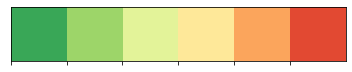

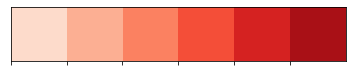

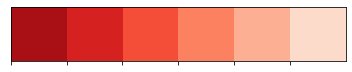

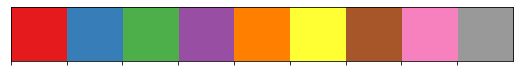

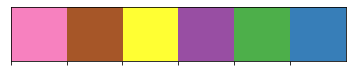

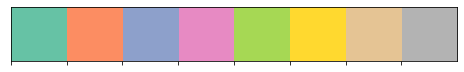

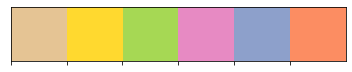

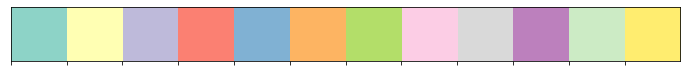

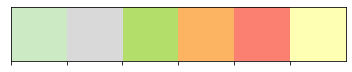

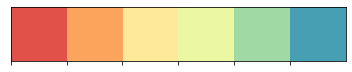

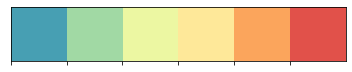

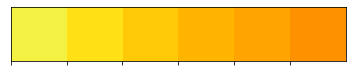

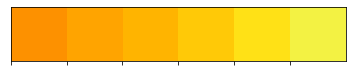

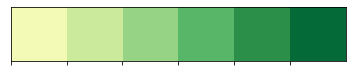

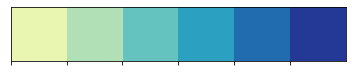

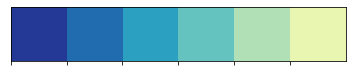

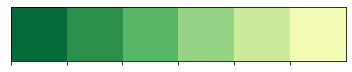

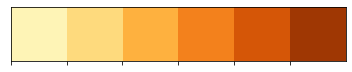

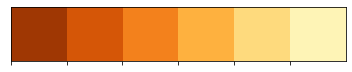

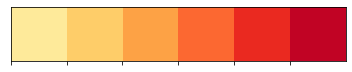

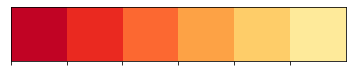

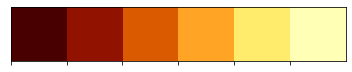

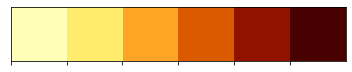

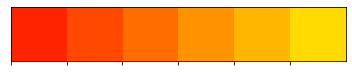

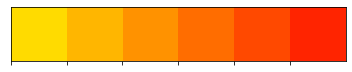

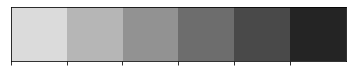

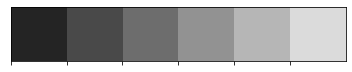

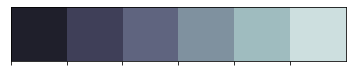

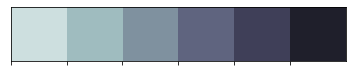

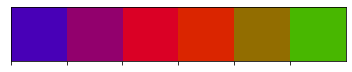

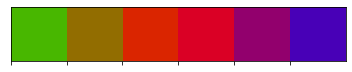

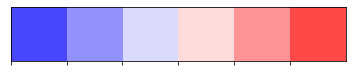

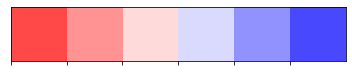

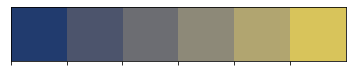

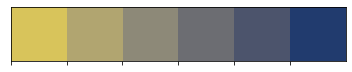

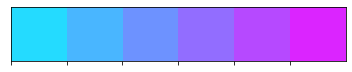

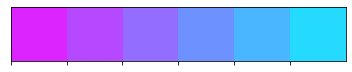

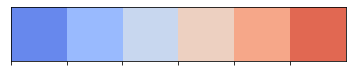

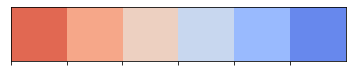

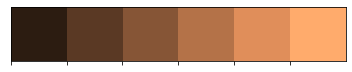

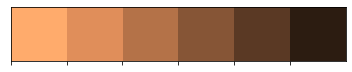

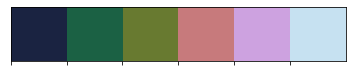

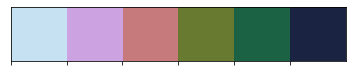

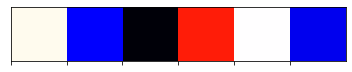

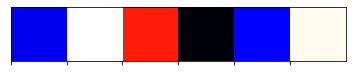

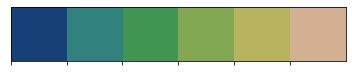

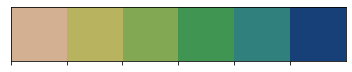

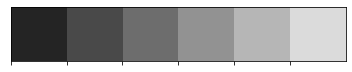

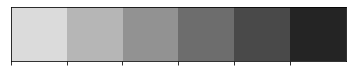

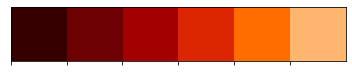

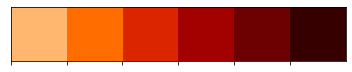

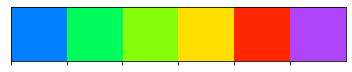

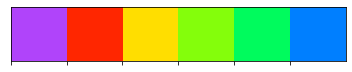

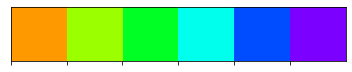

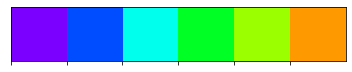

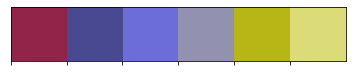

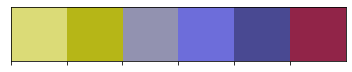

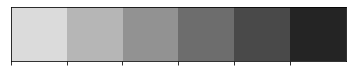

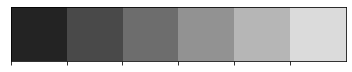

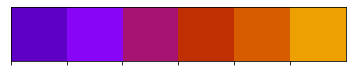

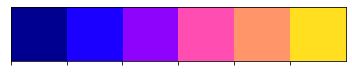

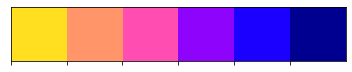

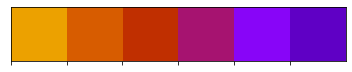

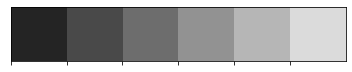

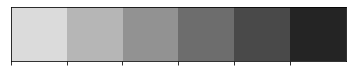

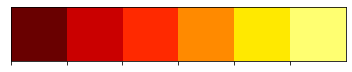

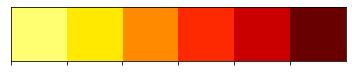

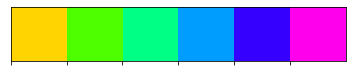

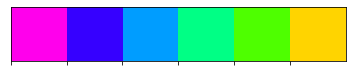

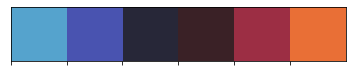

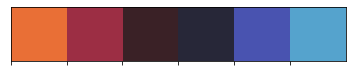

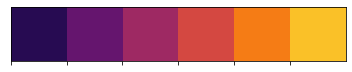

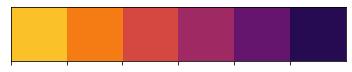

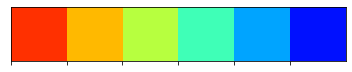

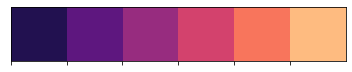

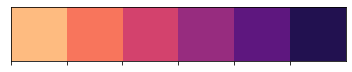

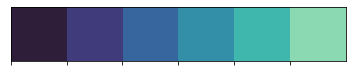

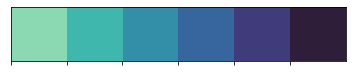

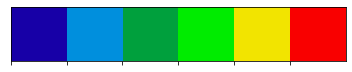

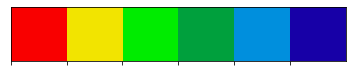

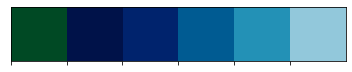

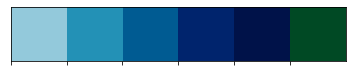

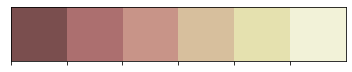

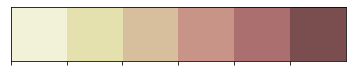

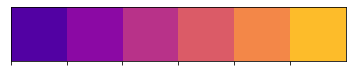

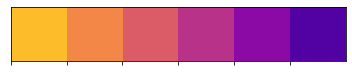

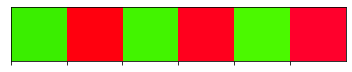

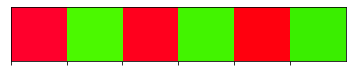

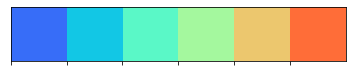

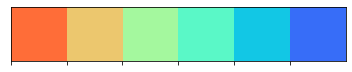

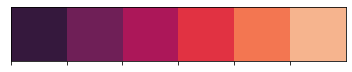

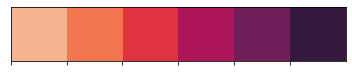

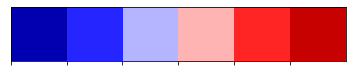

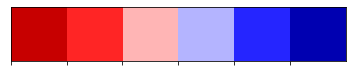

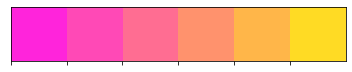

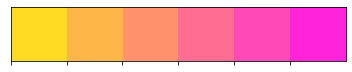

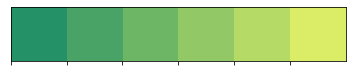

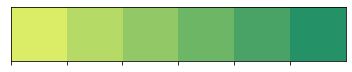

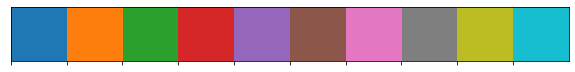

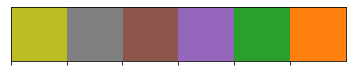

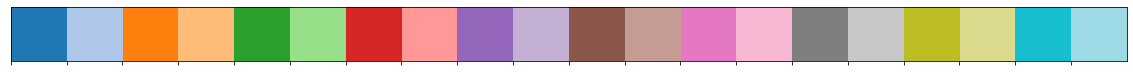

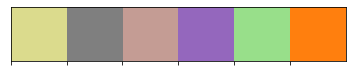

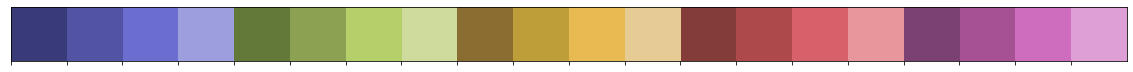

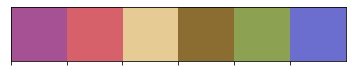

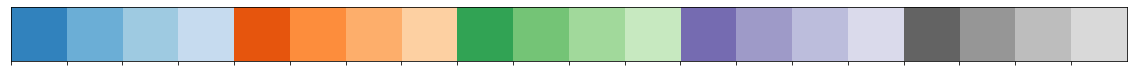

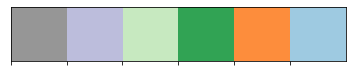

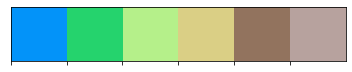

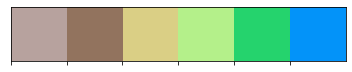

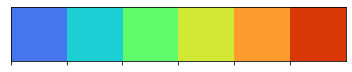

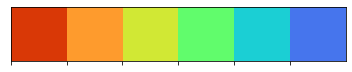

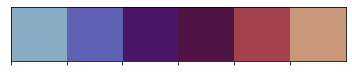

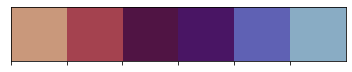

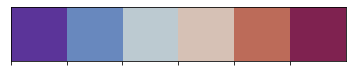

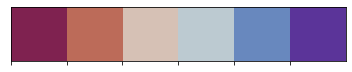

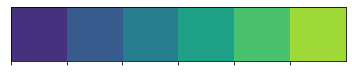

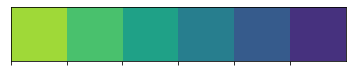

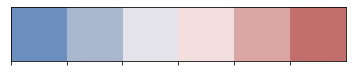

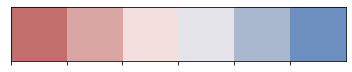

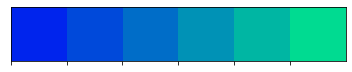

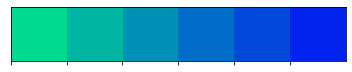

In [5]:
import seaborn as sns
listp = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r',
         'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys',
         'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r',
         'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r',
         'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy',
         'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r',
         'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia',
         'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd',
         'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r',
         'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r',
         'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r',
         'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow',
         'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2',
         'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire',
         'icefire_r', 'inferno', 'inferno_r', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral',
         'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism',
         'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring',
         'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r',
         'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r',
         'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter',
         'winter_r']
# jet was removed because raises ValueError
for p in listp:
    sns.palplot(sns.color_palette(p))

# Plots

## sns.barplot

In [9]:
fig, ax = plt.subplots()
sns.barplot(data=iris_df,
            x='species',
            y='sepal_length',
            hue="species",
            # callable that maps vector -> scalar, optional : Statistical function to estimate within each categorical bin.
            estimator=np.mean,
            ci=95,             # float or “sd” or None,
            orient="v"         # “v” | “h”,
            color="#1CB3B1",  # main color, exclusive with palette color matplotlib color, optional
            palette='magma',
            saturation=0.75,
            # errcolor= # matplotlib color
            # errwidth= # float
            # capsize= # float
            dodge=True,
            )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

## sns.catplot(kind="strip")

In [ ]:
sns.catplot(kind="strip", data=iris_df,
            x="species",
            y="petal_width",
            hue="species",
            jitter=True,
            split=False)

## sns.catplot(kind="swarm")

In [ ]:
sns.catplot(kind="swarm", data=iris_df,
            x="species",
            y="petal_width",
            hue="species")

## sns.catplot(kind="box")

In [ ]:
sns.catplot(kind="box", data=iris_df,
            x="species",
            y="petal_width",
            hue="species",
            color='#EE67CF'  # main color
            )

## sns.catplot(kind="violin")

In [ ]:
sns.catplot(kind="violin", data=iris_df,
            x="species",
            y="petal_width",
            hue="species",
            inner="stick",
            split=False,
            palette="pastel")

## sns.catplot(kind="boxen")

In [ ]:
sns.catplot(kind="boxen", data=iris_df,
            x="species",
            y="sepal_width")

## sns.catplot(kind="bar")

In [ ]:
sns.catplot(kind="bar", data=iris_df,
            x="species",
            y="petal_width",
            hue="species")

## sns.catplot(kind="count")

In [ ]:
sns.catplot(kind="count", data=iris_df,
            x="sepal_length",
            )

## sns.catplot(kind="point")

In [ ]:
sns.catplot(kind="point", data=iris_df,
            x="petal_width",
            y="sepal_width",
            hue="species")

## sns.displot

In [ ]:
sns.displot(iris_df,
            x="petal_length",
            hue="species",
            # col="sex",                   # add additional plots col-wise
            # stat="density",              # normalize hist area
            stat="probability",           # normalise hist values
            common_norm=False,            # normalise each sub-hist independantly
            # bins=20,                     # set bin number
            # bins=[1, 2, 3, 4, 5, 6, 7]), # set bins
            binwidth=0.5,                 # set bin size
            # discrete=True,               # if data values are discrete
            # shrink=.8,                   # shrink bins width-display
            #element="step",              #
            # multiple="stack",            # dodge
            rug=True,                     # add rug
            # color="blue",              # main color
            )

# sns.distplot(data_df['sepal_width'])

In [ ]:
sns.displot(iris_df,
            x="petal_length", y="petal_width")

sns.displot(iris_df, hue="species",
            x="petal_length", y="petal_width",
            binwidth=(2, .5),
            cbar=True,
            )

## sns.displot(kind="kde")

In [ ]:
sns.displot(iris_df, kind="kde",
            hue="species",
            # multiple="stack",
            fill=True,
            bw_adjust=.5,      # adjust bandwidth
            # cut=0,            # clip kde plot curve
            x="petal_length",
            y="petal_width",
            # thresh=.2,
            # levels=0.2,        # levels=[.01, .05, .1, .8]
            rug=True,
            )

In [ ]:
sns.displot(iris_df, kind="kde",
            x="petal_length",
            y="petal_width")

In [ ]:
sns.displot(iris_df, kind="kde",
            x="sepal_length",
            y="petal_length",
            hue="species")

## sns.displot(kind="ecdf")

In [ ]:
sns.displot(iris_df, kind="ecdf",
            x="petal_length",
            hue="species",
            rug=True)

## sns.heatmap

In [ ]:
plt.figure()
sns.heatmap(iris_df.corr(),
            vmin=-1,
            vmax=1,
            annot=True,             # add cell values on cell
            linewidth=0.5,          # linewidth separating cells
            linecolor="k",          # color of lines separating cells
            cbar=True,              # add a colorbar
            square=True,            # enforce square cells
            # yticklabels=cols,      # list of names for col labels
            # xticklabels=cols,      # list of names for col labels
            annot_kws={'size': 20},
            cmap="BuPu",            # YlGnBu/ Blues / BuPu / Greens
            )

In [ ]:
plt.figure(figsize=(4, 5))

dependent_variable = "petal_length"

g = sns.heatmap(iris_df.corr()[[dependent_variable]].sort_values(by=dependent_variable),
                annot=True,
                cmap='coolwarm',
                vmin=-1,
                vmax=1)

## sns.histplot

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=iris_df,
             x="sepal_length",
             hue="species",
             # {“count”, “frequency”, “density”, “probability”}
             stat="count",
             # bins="auto",           # str, number, vector, or a pair of such values
             # binwidth=None,         # number or pair of numbers
             discrete=None,          # bool
             cumulative=False,       # bool
             common_bins=True,       # bool
             common_norm=True,       # bool
             multiple="layer",       # {“layer”, “dodge”, “stack”, “fill”}
             element="bars",         # {“bars”, “step”, “poly”}
             fill=True,              # bool
             shrink=1,               # number
             kde=False,              # bool
             pmax=None,              # number or None
             cbar=False,             # bool
             palette=None,           #
             color=None,             #
             legend=True,            # bool
             )

## sns.lineplot

In [ ]:
plt.figure()
sns.lineplot(data=iris_df,
             x='petal_length',
             y='petal_width',
             hue="species",
             style="species",
             markers=True,
             )

## sns.lmplot

In [ ]:
sns.lmplot(data=iris_df,
           x="petal_length", y="petal_width",
           hue="species",
           col="species",           # add other plots column-wise
           # col_wrap=2,              # wrap plots
           # row="sepal_length",      # add other plots row-wise
           # x_estimator=np.mean,     # choose aggregation
           x_jitter=.05,
           # order=2,                 # change the order of regression
           # ci=None,                 # enable confidence interval
           # robust=True,             # exclude outliers from regression
           # logistic=True,           # use logistic curve (usefull for binary data)
           # markers=["o", "x", "*"], # use different markers for hue
           # palette="Set1",          # change color palet
           #markers=["o", "x", "+"],
           scatter_kws={"s": 80,       # scatter kwargs
                        # "color":"red"
                        },
           # line_kws={'color': 'red'}   # line kwargs
           )
#

## sns.jointplot

In [ ]:
sns.jointplot(data=iris_df,
              x="petal_length",
              y="sepal_length",
              hue="species")

## sns.jointplot(kind="kde")

In [ ]:
sns.jointplot(data=iris_df, kind="kde",
              x="petal_length",
              y="petal_width",
              hue="species"
              )

## sns.pairplot

In [ ]:

sns.pairplot(data=iris_df,
             # plot-kind in cross cells : {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
             kind="reg",
             # vars=,
             # x_vars=["sepal_length", "sepal_width", "petal_width"], # restrict variables on xaxis
             # y_vars=["sepal_length", "sepal_width", "sepal_width"], # restrict variables on yaxis
             hue="species",
             diag_kind="kde",            # plot-kind on diagonal cells : "auto", "hist", "kde", None
             height=1.5,                 # height of cell
             aspect=1,                   # width wrt heigth
             palette="Set2",
             corner=True,              # low-left-triangle plots only
             # plot_kws={'color':'green'}
             )  # .map_upper(sns.kdeplot, cmap="Blues_d")

## sns.regplot

In [ ]:
plt.figure()
sns.regplot(data=iris_df,
            x="sepal_width",
            y="sepal_length",
            order=1,      # change the order of regression, exclusive with order/logistic/robust/logx
            scatter=True,  # plot scatter
            fit_reg=True,  # plot regression line
            ci=100,        # confidence interval : None to hide
            # robust=True,   # exclude outliers from regression
            # x_jitter=.1   # jitter when x is discrete
            x_estimator=np.mean,  # add mean estimator
            # logx=True,     # use log regression, exclusive with order/logistic/robust/logx
            # logistic=False, # use logistic regression (for binary data), exclusive use with order/logistic/robust/logx
            )

## sns.relplot

In [ ]:

sns.relplot(
    data=tips_df,
    # kind="line", # None for scatter, line
    x="total_bill",
    y="tip",
    col="time",
    row="sex",
    hue="day",
    size="size",
    height=3,
    aspect=1,
    # style="species",
    # col_wrap=2,
    facet_kws=dict(sharex=False),
)

## sns.residplot

In [ ]:
plt.figure()
# compute regression and plot residuals
sns.residplot(data=iris_df,
              x="sepal_length",
              y="sepal_width",
              scatter_kws={"s": 80})

## sns.scatterplot

In [ ]:
plt.figure()
sns.scatterplot(data=iris_df,
                x='sepal_length',
                y='sepal_width',
                hue="species",
                style="species",
                size="petal_width",  # size of markers
                sizes=(10, 300),      # min and max markers sizes
                )

# Interactive iris : start here !

In [ ]:
%matplotlib ipympl
import seaborn as sns
import pandas as pd
import ipywidgets
import matplotlib.pyplot as plt

iris_df = sns.load_dataset("iris")

# all cols
iris_cols = list(iris_df.columns)
# all cols w None
iris_cols_ext = list(iris_cols)
iris_cols_ext.append(None)
# numerical features
iris_num_cols = list(iris_cols)
iris_num_cols.remove("species")
# numerical features w None
iris_num_cols_ext = list(iris_num_cols)
iris_num_cols_ext.append(None)

## sns.catplot(kind="count")

In [ ]:
@ipywidgets.interact
def plot(ys=iris_cols):
    sns.catplot(kind="count", data=iris_df,
                y=ys)

## sns.catplot(kind="boxplot")

In [ ]:
# stripplot plot : univariate counts
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols):
    sns.catplot(kind="box", data=iris_df,
                x=x,
                y=y,
                hue=hue)

## sns.caplot(kind="boxen")

In [ ]:
# stripplot plot : univariate counts
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols):
    sns.catplot(kind="boxen", data=iris_df,
                x=x,
                y=y, hue=hue)

## sns.caplot(kind="point")

In [ ]:
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols):
    sns.catplot(kind="point", data=iris_df,
                x=x,
                y=y,
                hue=hue)

## sns.caplot(kind="violin")

In [ ]:
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols, col=iris_cols_ext):
    sns.catplot(kind="violin", data=iris_df,
                x=x,
                y=y,
                hue=hue,
                col=col,
                inner="stick",
                split=False,      # hue level only
                palette="pastel")

## sns.catplot(kind="strip")

In [ ]:
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols):
    sns.catplot(kind="strip", data=iris_df,
                x=x,
                y=y,
                hue=hue,
                # jitter=True,
                dodge=True  # formerly "split"
                )

## sns.catplot(kind="swarm")

In [ ]:
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols):
    # plt.figure()
    sns.catplot(kind="swarm", data=iris_df,
                x=x,
                y=y,
                hue=hue)

## sns.heatmap

In [ ]:
@ipywidgets.interact
def plot(cols=ipywidgets.SelectMultiple(options=iris_cols),
         annot=True,
         cbar=True,
         square=True):
    fig, ax = plt.subplots()
    cols = list(cols)
    if len(cols) == 0:
        cols = list(iris_cols)
    sns.heatmap(iris_df[cols].corr(),
                vmin=-1,
                vmax=1,
                annot=annot,
                linewidth=0.5,  # linewidth separating cells
                linecolor="k",  # color of lines separating cells
                cbar=cbar,    # add a colorbar
                square=square  # enforce square cells
                )
    plt.tight_layout()

In [ ]:
def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    '''
    Takes df, a dependant variable as str
    Returns a heatmap of all independent variables' correlations with dependent variable
    '''
    plt.figure(figsize=(8, 10))
    g = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable),
                    annot=True,
                    cmap='coolwarm',
                    vmin=-1,
                    vmax=1)
    return g

## sns.histplot

In [ ]:

numerical_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]


@ipywidgets.interact
def plot(hue=iris_cols,
         x=iris_cols,
         stat=["count", "frequency", "density", "probability"]):
    fig, ax = plt.subplots()
    sns.histplot(
        data=iris_df,
        x=x,
        stat=stat,         # "count", "frequency", "density", "probability"
        # y=ys,
        hue=hue,
        discrete=False,
        cumulative=False,
        fill=False,
        kde=True,
        multiple="layer",   # {“layer”, “dodge”, “stack”, “fill”}
        element="bars",      # {"bars", "step", "poly"—
        cbar=True,
    )

## sns.pairplot 

In [ ]:

@ipywidgets.interact
def plot(hue=iris_cols_ext, diag_kind=["auto", "hist", "kde", None],
         kind=["scatter", "kde", "hist", "reg"],
         corner=False):
    sns.pairplot(data=iris_df,
                 # plot-kind in cross cells : {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
                 kind=kind,
                 # vars=,
                 x_vars=iris_num_cols,  # restrict variables on xaxis
                 y_vars=iris_num_cols,  # restrict variables on yaxis
                 hue=hue,
                 # plot-kind on diagonal cells : "auto", "hist", "kde", None
                 diag_kind=diag_kind,
                 height=1.5,                               # height of cell
                 aspect=1,                               # width wrt heigth
                 palette="Set2",
                 corner=corner,    # low-left-triangle plots only : True/false
                 )

## sns.regplot

In [ ]:


import numpy as np


@ipywidgets.interact
def plot(x=iris_num_cols, y=iris_num_cols, fit_reg=True, scatter=True, x_estimator=[None, np.mean]):
    plt.figure()
    sns.regplot(data=iris_df,
                x=x, y=y,
                order=1,      # change the order of regression, exclusive with order/logistic/robust/logx
                scatter=scatter,  # plot scatter
                fit_reg=fit_reg,  # plot regression line
                ci=100,        # confidence interval : None to hide
                x_bins=None,     # number of x bins for plotting, int or None
                # robust=True,   # exclude outliers from regression
                # x_jitter=.1   # jitter when x is discrete
                # add mean estimator : None or callable(vector)->scalar
                x_estimator=x_estimator,
                # logx=True,     # use log regression, exclusive with order/logistic/robust/logx
                # logistic=False, # use logistic regression (for binary data), exclusive use with order/logistic/robust/logx
                )

# JointGrid

Grid for drawing a bivariate plot with marginal univariate plots.
Many plots can be drawn by using the figure-level interface jointplot(). Use this class directly when you need more flexibility.
```python
seaborn.JointGrid(*,
    x=None,
    y=None,
    data=None,
    height=6, 
    ratio=5, 
    space=0.2, 
    dropna=False,
    xlim=None, 
    ylim=None, 
    size=None,
    marginal_ticks=False, 
    hue=None, 
    palette=None, 
    hue_order=None,
    hue_norm=None)
```

JointGrid methods: 
 - plot(self, joint_func, marginal_func, **kwargs) :Draw the plot by passing functions for joint and marginal axes.
 - plot_joint(self, func, **kwargs) : Draw a bivariate plot on the joint axes of the grid. 
 - plot_marginals(self, func, **kwargs) : Draw univariate plots on each marginal axes.
 - savefig(self, *args, **kwargs) : Save the figure using a “tight” bounding box by default.
 - set_axis_labels(self[, xlabel, ylabel]) : Set axis labels on the bivariate axes.

Initialize the grid : 
sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
The simplest plotting method, JointGrid.plot() accepts a pair of functions (one for the joint axes and one for both marginal axes):
g.plot(sns.scatterplot, sns.histplot)
g.plot(sns.scatterplot, sns.histplot, alpha=.7, edgecolor=".2", linewidth=.5)
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)
g = sns.JointGrid()

You can then plot by accessing the ax_joint, ax_marg_x, and ax_marg_y attributes, which are matplotlib.axes.Axes objects:

g = sns.JointGrid()
x, y = penguins["bill_length_mm"], penguins["bill_depth_mm"]
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=100, linewidth=1.5, ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)

g.plot(sns.regplot, sns.boxplot)
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
g.plot(sns.scatterplot, sns.histplot)

The figure will always be square (unless you resize it at the matplotlib layer), but its overall size and layout are configurable. The size is controlled by the height parameter. The relative ratio between the joint and marginal axes is controlled by ratio, and the amount of space between the plots is controlled by space:

sns.JointGrid(height=4, ratio=2, space=.05)

sns.JointGrid(marginal_ticks=True)
sns.JointGrid(xlim=(-2, 5), ylim=(0, 10))

# PairGrid

Pair grid : use when pairplot is not enough

PairGrid methods :
 - Map,
 - map_diag :
 - map_lower
 - map_offdiag
 - map_upper
 - savefig
 - set
 - tight_layout
 - add_legend()
 
Possible plot functions : 
 - plt.hist
 - plt.scatter
 - sns.histplot
 - sns.kdeplot
 
Signature : 
 ```python
seaborn.PairGrid(
    data, *,
    hue=None,
    hue_order=None,
    palette=None,
    hue_kws=None,
    vars=None,       # subset of vars
    x_vars=None,     # list of vars to plot on xaxis
    y_vars=None,     # list of vars to plot on yaxis
    corner=False,    # bool : If True, don’t add axes to the upper (off-diagonal) triangle of the grid, making this a “corner” plot.
    diag_sharey=True,
    height=2.5,
    aspect=1,
    layout_pad=0.5,
    despine=True,
    dropna=False,
    size=None
)
```


In [ ]:
# creation of PairGrid
iris_pg = sns.PairGrid(iris, hue=”species”, vars=list_of_cols)

# map function to plots
iris_pg.map(plt.scatter)
# map function to diagonal plots
iris_pg.map_diag(plt.hist)
# don’t use the hue on the diagonal
iris_pg.map_diag(sns.histplot, hue=None, color=".3")
iris_pg.map_diag(sns.kdeplot, lw=3, legend=False)
# map function to off-diagonal plots
iris_pg.map_offdiag(plt.scatter)
iris_pg.map_offdiag(sns.scatterplot, size=iris["sepal_length"])
# map function to upper triangle plots
iris_pg.map_upper(plt.scatter)
iris_pg.map_upper(
    plt.scatter,
    x_vars=[“petal_length”, “petal_width”],
    y_vars=[“sepal_length”, “sepal_width”],
)
# map function to lower triangle plots
iris_pg.map_lower(sns.kdeplot)

# add legend
iris_pg.add_legend()
iris_pg.add_legend(title="", adjust_subtitles=True)

# set
iris_pg.set(ylim=(-1, 11), yticks=[0, 5, 10])

Add corr-coefs to plots

In [ ]:
from scipy import stats

mean = np.zeros(3)
cov = np.random.uniform(.2, .4, (3, 3))
cov += cov.T
cov[np.diag_indices(3)] = 1
data = np.random.multivariate_normal(mean, cov, 100)
df = pd.DataFrame(data, columns=["X", "Y", "Z"])


def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)


g = sns.PairGrid(df, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)

# Figure-level plots vs axes-level plots

The following are figure level, that defaults to specific 
- displot :default to scatterplot
- relplot : default to histplot
- catplot : default to stripplot
The figure-level functions return a FacetGrid instance
They accept a “col” to facet and a “kind” arg
 
The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into.
The axes-level functions call matplotlib.pyplot.gca() internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they additionally accept an ax= argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go.

In contrast, figure-level functions cannot (easily) be composed with other plots. By design, they “own” their own figure, including its initialization, so there’s no notion of using a figure-level function to draw a plot onto an existing axes. This constraint allows the figure-level functions to implement features such as putting the legend outside of the plot.


# Other figure-level plots : PairGrid vs FacetGrid 
2 other functions : jointplot and pairplot
Two important plotting functions in seaborn don’t fit cleanly into the classification scheme discussed above. These functions, jointplot() and pairplot(), employ multiple kinds of plots from different modules to represent mulitple aspects of a dataset in a single figure. Both plots are figure-level functions and create figures with multiple subplots by default. But they use different objects to manage the figure: JointGrid and PairGrid, respectively.
 
It’s important to understand the differences between a FacetGrid and a PairGrid. In the former, each facet shows the same relationship conditioned on different levels of other variables. In the latter, each plot shows a different relationship
 
 